In [7]:
import torch
import math

In [8]:
import gpytorch
from matplotlib import pyplot as plt
%matplotlib inline

In [9]:
class GP(gpytorch.models.ExactGP):
    def __init__(self, train_x, train_y, likelihood):
        super(GP, self).__init__(train_x, train_y, likelihood)
        self.mean_module = gpytorch.means.ConstantMean()
        self.covar_module = gpytorch.kernels.RBFKernel(param_transform=torch.exp)
        
    def forward(self, x):
        mean = self.mean_module(x)
        covar = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean, covar)

In [10]:
train_y = torch.tensor([-2, 0, 0.5, -1.4, -1.5, -2, 1]) * 0.5
train_x = torch.tensor([-4, -3, -1, -0.075, 2, 3, 4])
likelihood = gpytorch.likelihoods.GaussianLikelihood(param_transform=torch.exp)
model = GP(train_x, train_y, likelihood)
model.covar_module.raw_lengthscale.data.fill_(-0.5)
likelihood.noise_covar.raw_noise.data.fill_(-5)

tensor([[-5.]])

In [17]:
test_x = torch.linspace(-15, 15, 501)
model.eval()
output = model(test_x)
samples = output.sample(torch.Size((25,)))
lower, upper = output.confidence_region()

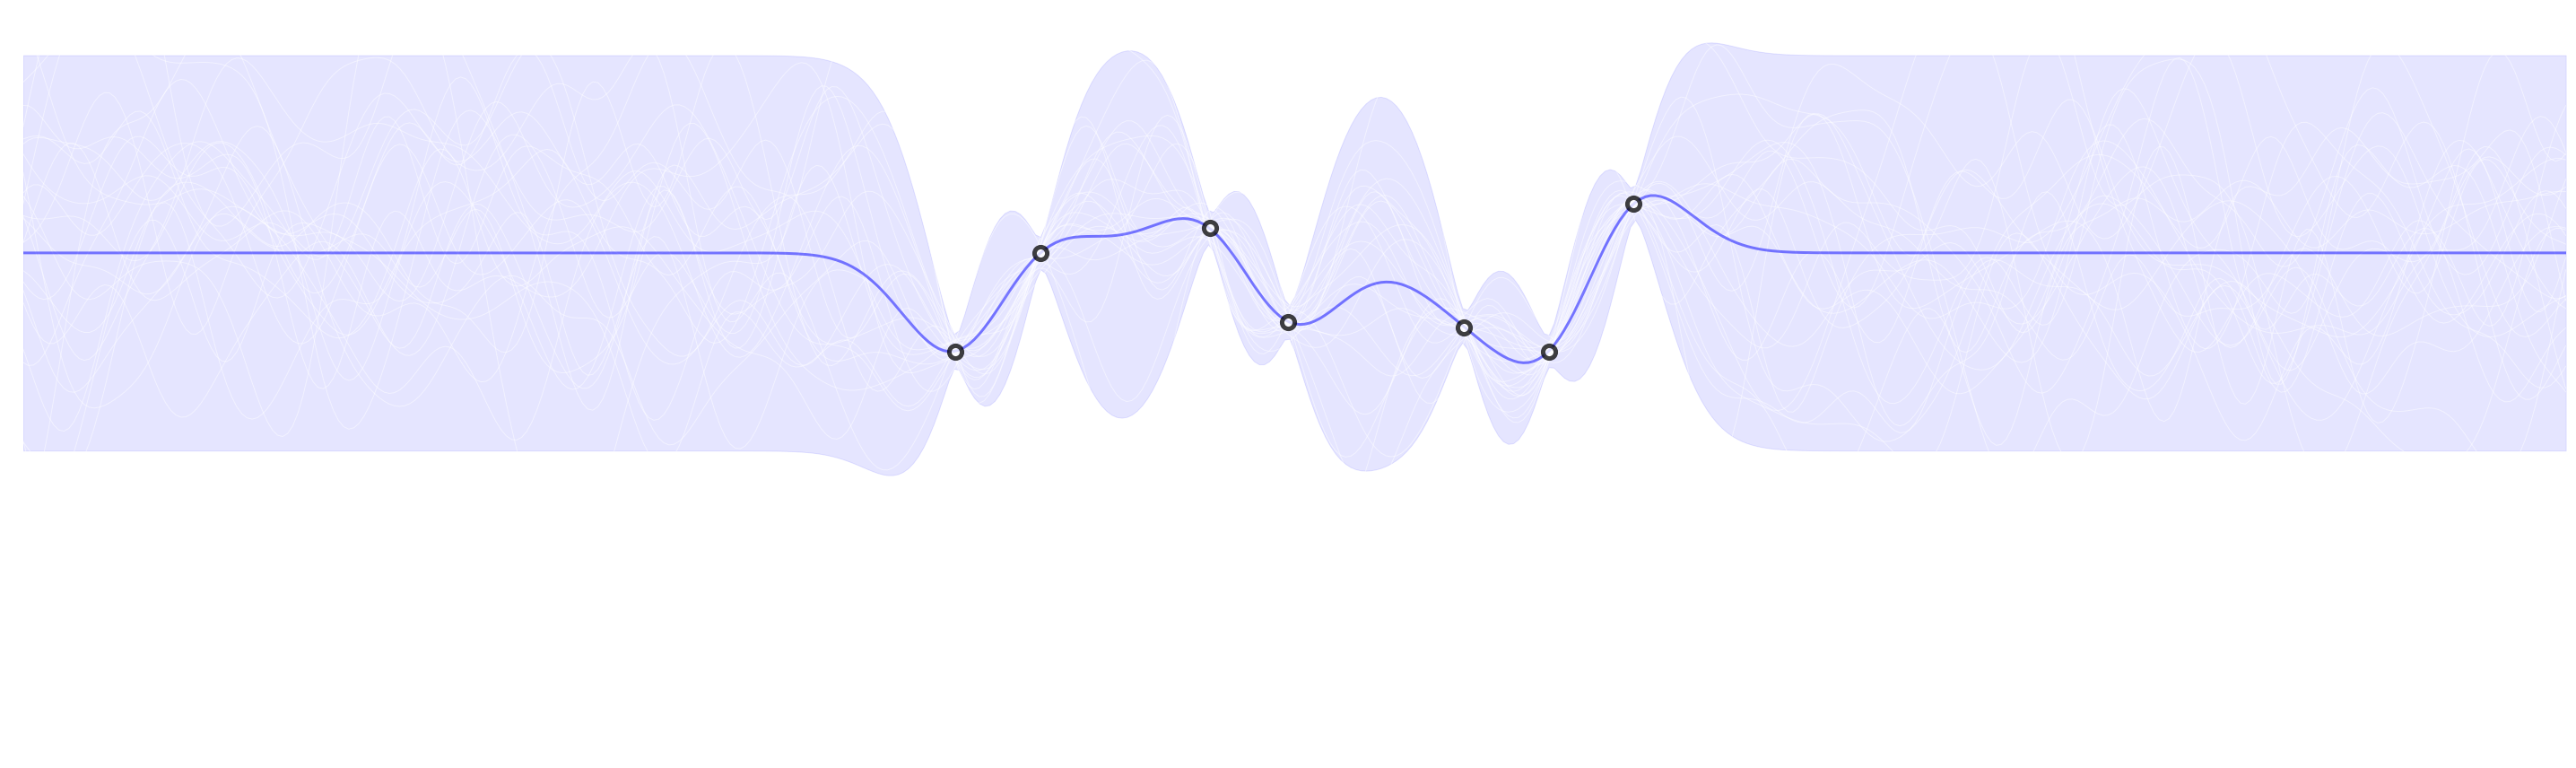

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(40, 12))
ax.fill_between(test_x.detach().numpy(), lower.detach().numpy(), upper.detach().numpy(), color='blue', alpha=0.1)
ax.plot(test_x.detach().numpy(), samples.detach().numpy().T, color='white', linewidth=1, alpha=0.5)
ax.plot(test_x.detach().numpy(), output.mean.detach().numpy(), color='blue', linewidth=3, alpha=0.5)
ax.scatter(train_x.detach().numpy(), train_y.detach().numpy(), marker='o', color='white',
           edgecolor='black', s=200, zorder=10, linewidth=5, alpha=0.75)

ax.set_ylim([-5, 2.5])
ax.set_xlim([-15, 15])
ax.set_axis_off()
fig.tight_layout()

In [29]:
fig.savefig('background.png', transparent=True)